In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score,mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score

# Data preparation

In [21]:
df = pd.read_csv('../data/processed/crossfit_db.csv')

In [22]:
#removing null values
df = df.dropna()

In [38]:
# Split train and test
drop_features = ['year', 'firstName', 'lastName', 'status', 'gender', 'age', 
                 'rank_2023_1', 'rank_2023_2', 'rank_2023_3','rank_2023_4',
                 'countryOfOriginCode', 'regionId', 'affiliateId', 'affiliateName',
                 'competitorName', 'countryOfOriginName', 'regionName' ,
                 'overallRank', 'overall_score_2023',
                 'score_reps_2023_1', 'score_reps_2023_2','score_reps_2023_3','score_reps_2023_4', 'score_time_2023_4'
                 ]


X = df.drop(columns=drop_features)
y = df["overall_score_2023"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

# Evaluate the model

In [40]:
y_pred = lr.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.8089162698819776
MAE: 33971.9467152358
RMSE: 48503.69392274786


In [26]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
error = mean_absolute_percentage_error(y_pred, y_test)
print("Mean absolute percentage error {0:.2f}%".format(error))

Mean absolute percentage error 29.08%


In [28]:
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """

    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind="bar")
    plt.grid(True, axis="y")
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles="dashed");

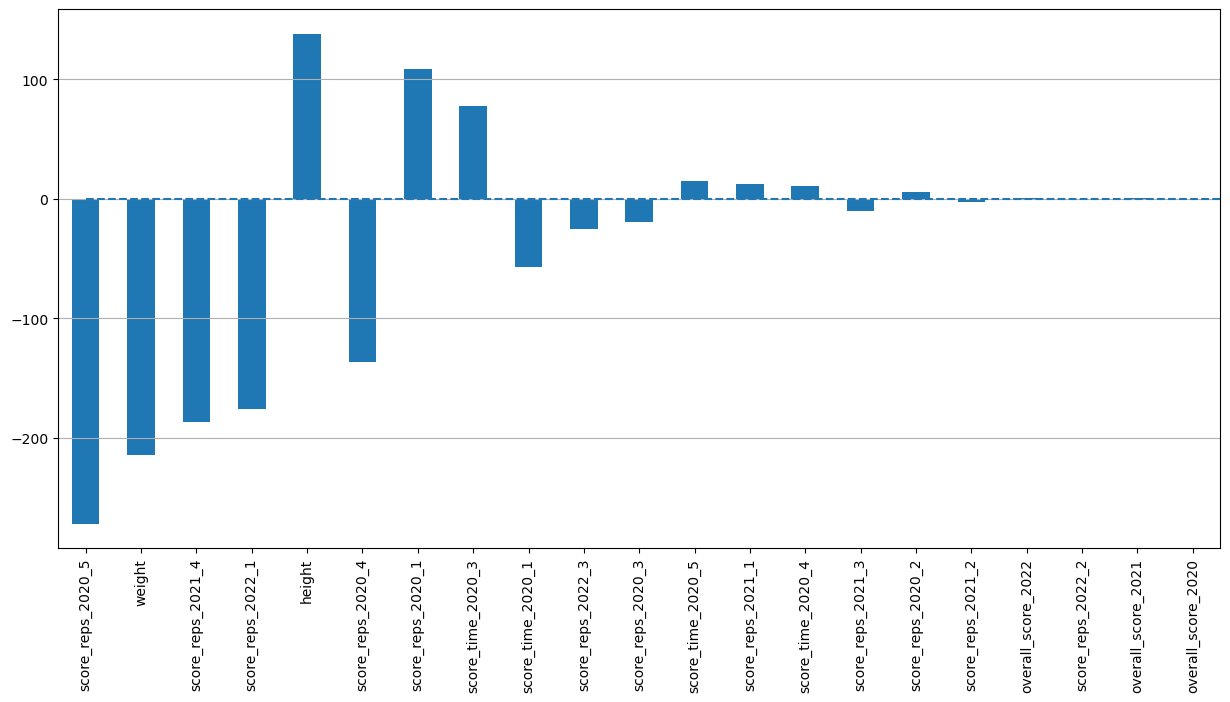

In [29]:
plotCoefficients(lr)

# Model StandardScaler

In [45]:
scaler = StandardScaler()

In [47]:
drop_features = ['year', 'firstName', 'lastName', 'status', 'gender', 'age', 
                 'rank_2023_1', 'rank_2023_2', 'rank_2023_3','rank_2023_4',
                 'countryOfOriginCode', 'regionId', 'affiliateId', 'affiliateName',
                 'competitorName', 'countryOfOriginName', 'regionName' ,
                 'overallRank', 'overall_score_2023',
                 'score_reps_2023_1', 'score_reps_2023_2','score_reps_2023_3','score_reps_2023_4', 'score_time_2023_4'
                 ]

X = df.drop(columns=drop_features)
y = df["overall_score_2023"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

R2: 0.8089162698819752
MAE: 33971.946715235295
RMSE: 48503.693922748156
Mean absolute percentage error 29.08%


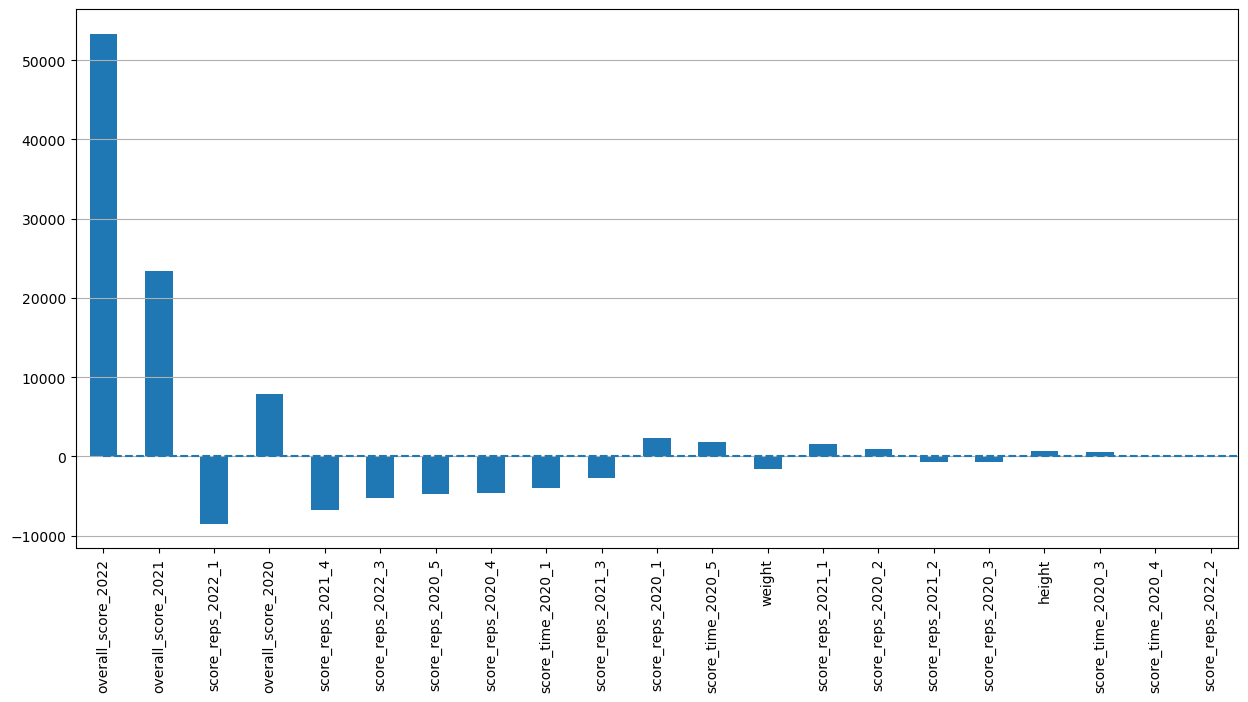

In [48]:
y_pred_scaled = lr.predict(X_test_scaled)

print('R2:', r2_score(y_test, y_pred_scaled))
print('MAE:', mean_absolute_error(y_test, y_pred_scaled))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_scaled)))

error = mean_absolute_percentage_error(y_pred_scaled, y_test)
print("Mean absolute percentage error {0:.2f}%".format(error))

plotCoefficients(lr)

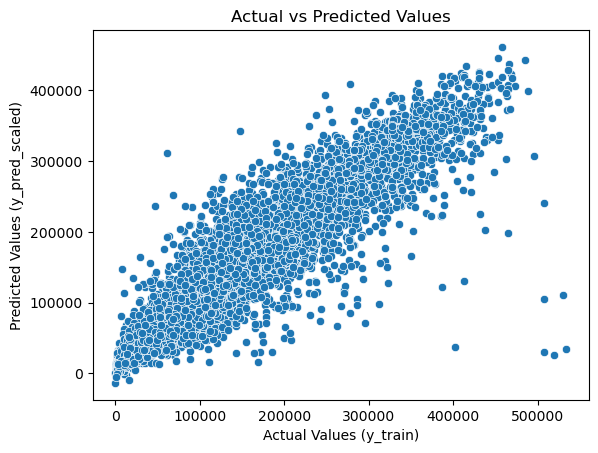

In [51]:
sns.scatterplot(x=y_test, y=y_pred_scaled)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_scaled)')
plt.show()